In [12]:
%load_ext autoreload
%autoreload 2
import numpy as np
from model import Model
from matplotlib import pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
model = Model()
model.setup()

model.par.Na = 50
model.par.Tmax = 45
model.par.a_max = 1000
model.par.Smax = 4
model.par.Ntypes = 1
model.par.sigma_taste = 0.01

model.set_grids()

In [14]:
par = model.par
sol = model.sol

In [15]:
model.solve()

c:\Users\sofie\OneDrive\Dokumenter\Skole\DynamicProgramming\DP_term_paper\main_model\model.py:170: RuntimeWarning: invalid value encountered in double_scalars
  return (c**(1-par.rho))/(1-par.rho) - par.vartheta*(ell**(1+par.nu))/(1+par.nu) - penalty


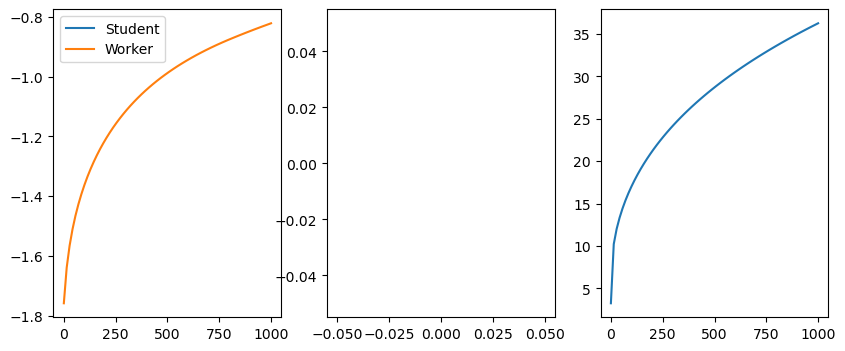

In [16]:
t = -2
s = 3
type = 0

fig,ax = plt.subplots(1,3,figsize=(10,4))

ax[0].plot(sol.m[type,t,0,s,:,0],sol.V[type,t,0,s,:,0],label = "Student")
ax[0].plot(sol.m[type,t,1,s,:,0],sol.V[type,t,1,s,:,0],label = "Worker")
ax[0].legend()

ax[1].plot(sol.m[type,t,0,s,:,0],sol.ccp_work[type,t,0,s,:,0],label = "Student")

ax[2].plot(sol.m[type,t,1,s,:,0],sol.c[type,t,1,s,:,0],label = "Student")

IndexError: index 1 is out of bounds for axis 0 with size 1

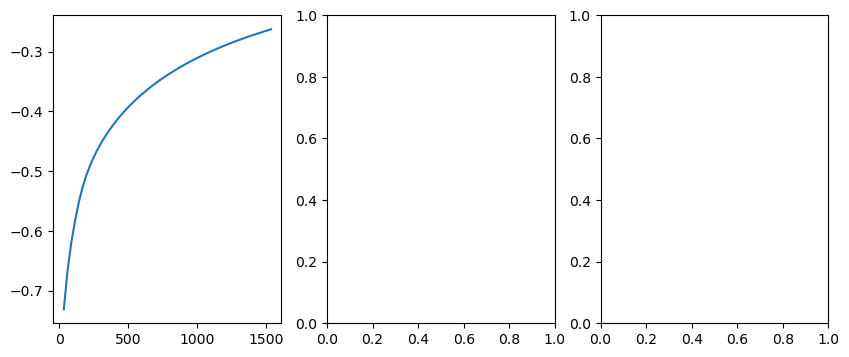

In [17]:
t = 2
s = 2

fig,ax = plt.subplots(1,3,figsize=(10,4))

ax[0].plot(sol.m[0,t,0,s,:,0],sol.V[0,t,0,s,:,0],label = "Clever and Rich Economist")
ax[0].plot(sol.m[1,t,0,s,:,0],sol.V[1,t,0,s,:,0],label = "Stupid and Poor Economist")
ax[0].legend()

ax[1].plot(sol.m[0,t,0,s,:,0],sol.ccp_work[0,t,0,s,:,0],label = "Student")

ax[2].plot(sol.m[0,t,0,s,:,0],sol.c[0,t,0,s,:,0],label = "Student")

Text(0.5, 1.0, 'Savings')

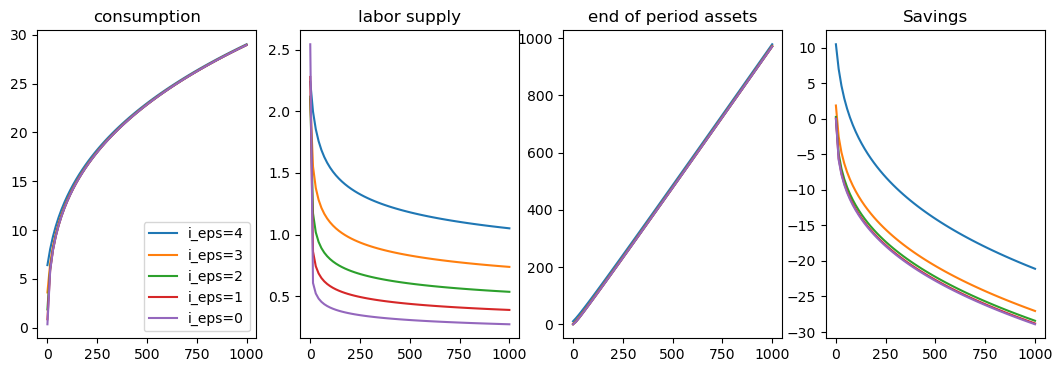

In [19]:
# plot some policy functions, just to be sure
t = -1
edu = 0
type = 0 

fig = plt.figure(figsize=(13,4))
ax = fig.add_subplot(1,4,1)
ax.plot(sol.m[type, t, 1, edu, par.Ba:, 4], sol.c[type, t, 1, edu, par.Ba:, 4], label='i_eps=4')
ax.plot(sol.m[type, t, 1, edu, par.Ba:, 3], sol.c[type, t, 1, edu, par.Ba:, 3], label='i_eps=3')
ax.plot(sol.m[type, t, 1, edu, par.Ba:, 2], sol.c[type, t, 1, edu, par.Ba:, 2], label='i_eps=2')
ax.plot(sol.m[type, t, 1, edu, par.Ba:, 1], sol.c[type, t, 1, edu, par.Ba:, 1], label='i_eps=1')
ax.plot(sol.m[type, t, 1, edu, par.Ba:, 0], sol.c[type, t, 1, edu, par.Ba:, 0], label='i_eps=0')
ax.set_title('consumption')
ax.legend()

ax = fig.add_subplot(1,4,2)
ax.plot(sol.m[type, t, 1, edu, par.Ba:, 4], sol.ell[type, t, 1, edu, par.Ba:, 4])
ax.plot(sol.m[type, t, 1, edu, par.Ba:, 3], sol.ell[type, t, 1, edu, par.Ba:, 3])
ax.plot(sol.m[type, t, 1, edu, par.Ba:, 2], sol.ell[type, t, 1, edu, par.Ba:, 2])
ax.plot(sol.m[type, t, 1, edu, par.Ba:, 1], sol.ell[type, t, 1, edu, par.Ba:, 1])
ax.plot(sol.m[type, t, 1, edu, par.Ba:, 0], sol.ell[type, t, 1, edu, par.Ba:, 0])
ax.set_title('labor supply')

ax = fig.add_subplot(1,4,3)
ax.plot(sol.m[type, t, 1, edu, par.Ba:, 4], sol.a[type, t, 1, edu, par.Ba:, 4])
ax.plot(sol.m[type, t, 1, edu, par.Ba:, 3], sol.a[type, t, 1, edu, par.Ba:, 3])
ax.plot(sol.m[type, t, 1, edu, par.Ba:, 2], sol.a[type, t, 1, edu, par.Ba:, 2])
ax.plot(sol.m[type, t, 1, edu, par.Ba:, 1], sol.a[type, t, 1, edu, par.Ba:, 1])
ax.plot(sol.m[type, t, 1, edu, par.Ba:, 0], sol.a[type, t, 1, edu, par.Ba:, 0])
ax.set_title('end of period assets')

ax = fig.add_subplot(1,4,4)
ax.plot(sol.m[type, t, 1, edu, par.Ba:, 4], sol.a[type, t, 1, edu, par.Ba:, 4]-sol.m[type, t, 1, edu, par.Ba:, 4])
ax.plot(sol.m[type, t, 1, edu, par.Ba:, 3], sol.a[type, t, 1, edu, par.Ba:, 3]-sol.m[type, t, 1, edu, par.Ba:, 3])
ax.plot(sol.m[type, t, 1, edu, par.Ba:, 2], sol.a[type, t, 1, edu, par.Ba:, 2]-sol.m[type, t, 1, edu, par.Ba:, 2])
ax.plot(sol.m[type, t, 1, edu, par.Ba:, 1], sol.a[type, t, 1, edu, par.Ba:, 1]-sol.m[type, t, 1, edu, par.Ba:, 1])
ax.plot(sol.m[type, t, 1, edu, par.Ba:, 0], sol.a[type, t, 1, edu, par.Ba:, 0]-sol.m[type, t, 1, edu, par.Ba:, 0])
ax.set_title('Savings')